In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
def str_to_float(number):
    num = number.split(',')
    if len(num)==1 :
        return float(num[0])
    else :
        return (float(num[0]+'.'+num[1]))

str_to_float_v = np.vectorize(str_to_float)

In [89]:
def new_name(path,ext):
    componants = path.split("\\")
    name = componants[-1]
    name2 = name[:-4]
    return (name2 + "." + ext)

In [90]:
def plot_csv(path):
    data = pd.read_csv(path, index_col="Bal",delimiter=";")
    columns = data.columns
    data_to_plot = columns[2]
    
    val = str_to_float_v(data[data_to_plot].values)

    plt.figure()
    plt.plot(val)
    plt.xlabel("Balayage")
    plt.ylabel(data_to_plot)
    plt.grid()
    plt.savefig('Plot\\'+new_name(path,'png'))
    plt.show()

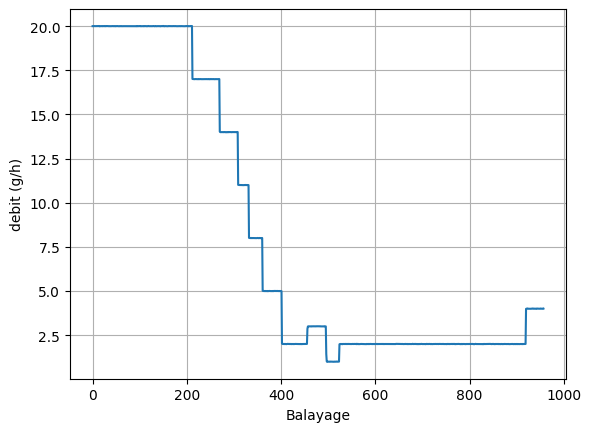

In [198]:
plot_csv("Data\debit.csv")

In [203]:
def detect_stable_stage(path, precision=0.1, window_size=100) :
    data = pd.read_csv(path, index_col='Bal', delimiter=';')
    data_of_interest = data.columns[2]
    values = str_to_float_v(data[data_of_interest].values)

    n = len(values)
    variances = np.empty(n-window_size)
    means = np.empty(n-window_size)

    # print(values)
    
    for i in range(n - window_size):
        window_data = values[i:i+window_size]
        var = np.var(window_data)
        mean = np.mean(window_data)
        variances[i] = var
        means[i] = mean
        
    points_stage = np.where(variances < precision)[0]
    points_stage_by_stage = np.split(points_stage, np.where(np.diff(points_stage) != 1)[0]+1)
    nb_stages = len(points_stage_by_stage)
    # print(nb_stages)
    stages_matrix = np.empty((nb_stages,3))
    # print(np.amin(points_stage_by_stage, axis=1))
    stages_matrix[:,0] = list(map(min,points_stage_by_stage))
    stages_matrix[:,1] = list(map(max,points_stage_by_stage))
    stages_matrix[:,2] = means[stages_matrix[:,0].astype(int)]

    plt.plot(variances)
    plt.plot([precision]*(n-window_size),'r')
    return stages_matrix

array([[  0.    , 202.    ,  19.9999],
       [212.    , 260.    ,  17.0023],
       [270.    , 299.    ,  14.0007],
       [309.    , 322.    ,  11.0045],
       [332.    , 351.    ,   8.0016],
       [361.    , 392.    ,   5.0024],
       [402.    , 447.    ,   2.0035],
       [455.    , 486.    ,   2.8861],
       [496.    , 515.    ,   1.0441],
       [523.    , 910.    ,   1.8975],
       [920.    , 947.    ,   3.9997]])

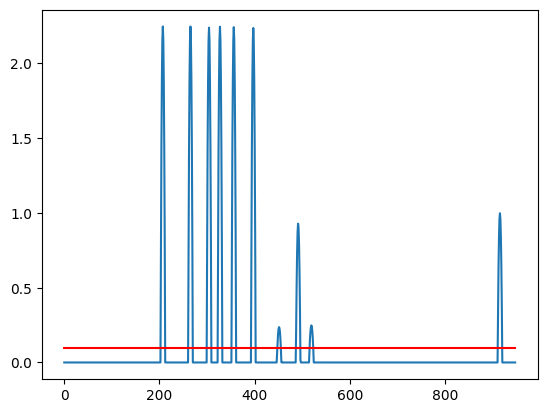

In [204]:
detect_stable_stage("Data\debit.csv",precision=0.1,window_size=10)